In [1]:
import pandas as pd
import uproot
import cupy as cp
import boost_histogram as bh
import time

In [2]:
def no_DN (frame):
    
    i = frame.index[0][0]
    new_frame = frame.loc[(frame['isDN'].values == False) & (frame['hitTime'].values < 300)]
    return new_frame.loc[i]

In [3]:
def first (frame):
    frame_sort = frame.sort_values(['hitTime'])
    frame_first = frame_sort.drop_duplicates(subset='pmtID', keep='first')
    frame_last = frame_first.sort_values('hitTime', ascending=False)
    return frame_last

In [4]:
def normal_ft(ev):
    
    mi = ev['hitTime'].min()
    
    a = ev['nHits'].values
    b = ev['pmtID'].values
    c = ev['hitTime'] - mi
    data = {'nHits': a, 'pmtID': b, 'hitTime': c}
        
    norm = pd.DataFrame(data)
    return norm

In [10]:
def save_hist (data, info, n, pre, b):
    
    dst_dir = '/home/centos/prova_E/E8_100/'
    
    hist = bh.Histogram(bh.axis.Regular(100, 0, 300))
    for i in info['evtID']:
        name = pre+str(i)+'_'+str(b)+'.npy'
        ev = data.pandas.df(entrystart=i, entrystop=i+1)
        try:
            ev_noDN = no_DN(ev)
        except:
            print(i, ': solo dark noise')
            continue
        ev_first = first(ev_noDN)
        ev_norm = normal_ft(ev_first)
        ev_time= ev_norm['hitTime'].values
        hist.fill(ev_time)
        array = hist.to_numpy()
        time = array[0]
        
        cp.save(dst_dir + name, time)
        hist.reset()

In [6]:
def call_all (file, a):
    
    data_file = uproot.open(file)
    INFO = data_file['true_info'].pandas.df()
    DATA = data_file["lpmt_hits"]
    
    if file.startswith('/home/centos/FlatComplete'):
        name = 'pos'
        
        INFO_E8 = INFO.loc[(INFO['E'] > 8) & (INFO['E'] < 9) ]
        
    elif file.startswith('/home/centos/ElectronDataset'):
        name = 'el'
        
        INFO_E8 = INFO.loc[(INFO['E'] > 9) & (INFO['E'] < 10) ]
        
    else:
        print('file non riconosciuto')
        
    save_hist(DATA, INFO_E8, 8, name, a)

In [7]:
P0 = "/home/centos/FlatComplete/eplus_hits_dn_0.root"
P1 = "/home/centos/FlatComplete/eplus_hits_dn_1.root"
P2 = "/home/centos/FlatComplete/eplus_hits_dn_2.root"
P3 = "/home/centos/FlatComplete/eplus_hits_dn_3.root"
P4 = "/home/centos/FlatComplete/eplus_hits_dn_4.root"
P5 = "/home/centos/FlatComplete/eplus_hits_dn_5.root"
P6 = "/home/centos/FlatComplete/eplus_hits_dn_6.root"
P7 = "/home/centos/FlatComplete/eplus_hits_dn_7.root"
P8 = "/home/centos/FlatComplete/eplus_hits_dn_8.root"
P9 = "/home/centos/FlatComplete/eplus_hits_dn_9.root"

In [8]:
E0 = "/home/centos/ElectronDataset/Hits/eminus_hits_dn_0.root"
E1 = "/home/centos/ElectronDataset/Hits/eminus_hits_dn_1.root"
E2 = "/home/centos/ElectronDataset/Hits/eminus_hits_dn_2.root"
E3 = "/home/centos/ElectronDataset/Hits/eminus_hits_dn_3.root"
E4 = "/home/centos/ElectronDataset/Hits/eminus_hits_dn_4.root"
E5 = "/home/centos/ElectronDataset/Hits/eminus_hits_dn_5.root"
E6 = "/home/centos/ElectronDataset/Hits/eminus_hits_dn_6.root"
E7 = "/home/centos/ElectronDataset/Hits/eminus_hits_dn_7.root"
E8 = "/home/centos/ElectronDataset/Hits/eminus_hits_dn_8.root"
E9 = "/home/centos/ElectronDataset/Hits/eminus_hits_dn_9.root"

In [11]:
time.strftime("%H") +":"+ time.strftime("%M")
call_all(P0, 0)
call_all(E0, 0)
time.strftime("%H") +":"+ time.strftime("%M")

'10:23'

In [12]:
call_all(P1, 1)
call_all(E1, 1)

In [13]:
call_all(P2, 2)
call_all(E2, 2)

In [14]:
1+1

2

In [15]:
call_all(P3, 3)
call_all(E3, 3)

In [16]:
time.strftime("%H") +":"+ time.strftime("%M")

'12:01'

In [17]:
call_all(P4, 4)
call_all(E4, 4)

In [18]:
time.strftime("%H") +":"+ time.strftime("%M")

'12:27'

In [19]:
call_all(P5, 5)
call_all(E5, 5)

In [20]:
time.strftime("%H") +":"+ time.strftime("%M")

'12:54'

In [21]:
call_all(P6, 6)
call_all(E6, 6)

In [22]:
time.strftime("%H") +":"+ time.strftime("%M")

'13:21'

In [23]:
call_all(P7, 7)
call_all(E7, 7)

In [24]:
time.strftime("%H") +":"+ time.strftime("%M")

'13:48'

In [25]:
call_all(P8, 8)
call_all(E8, 8)

In [26]:
time.strftime("%H") +":"+ time.strftime("%M")

'14:15'

In [27]:
call_all(P9, 9)
call_all(E9, 9)

In [28]:
time.strftime("%H") +":"+ time.strftime("%M")

'14:42'

# ------------------------------

In [51]:
import os
import cupy as cp
import matplotlib.pyplot as plt
import numpy as np

In [52]:
def summarize_diagnostics(history):
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')

In [3]:
folder = 'prova_E/E8_100/'
i = 0
for file in os.listdir(folder):
    i += 1
print(i)

200057


In [43]:
E8 = np.empty((200057, 100, 1), dtype=cp.float64)
labels_E8 = np.zeros(200057)
folder = 'prova_E/E8_100/'
i = 0
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_E8[i] = 1
    array = np.load(folder + file)
    array = cp.reshape(array, (100,1))
    E8[i] = array
    i += 1

In [5]:
labels_E8[0]

0.0

In [30]:
E8[0].flatten().shape

(100,)

In [76]:
x = np.linspace(0, 100, 101)
x

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100.])

<BarContainer object of 100 artists>

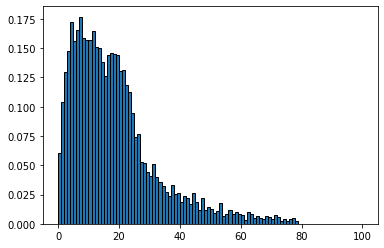

In [85]:
plt.bar(x[:-1], E8[0].flatten(), width=np.diff(x), ec='black', align='edge')

<BarContainer object of 100 artists>

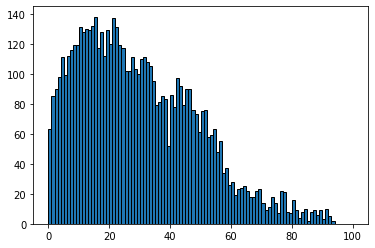

In [7]:
plt.bar(range(100), E8[1].flatten(), width=1, ec='black', align='edge')

In [44]:
E8 = E8/E8.max()

In [45]:
from sklearn.model_selection import train_test_split
E8X_train, E8X_test, E8Y_train, E8Y_test = train_test_split(E8 , labels_E8 ,test_size=0.2)

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D, BatchNormalization

model = Sequential()
model.add(Conv1D(32, 3, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(100, 1)))
model.add(MaxPooling1D(2))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv1D(64, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling1D(2))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv1D(128, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling1D(2))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [19]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [20]:
history = model.fit(E8X_train, E8Y_train, batch_size=64, validation_data=(E8X_test, E8Y_test), epochs=20)

Train on 160045 samples, validate on 40012 samples
Epoch 1/20
160045/160045 [==============================] - 47s 295us/step - loss: 0.7084 - accuracy: 0.5070 - val_loss: 0.6920 - val_accuracy: 0.5146
Epoch 2/20
160045/160045 [==============================] - 46s 286us/step - loss: 0.6922 - accuracy: 0.5171 - val_loss: 0.6915 - val_accuracy: 0.5215
Epoch 3/20
160045/160045 [==============================] - 45s 283us/step - loss: 0.6907 - accuracy: 0.5264 - val_loss: 0.6907 - val_accuracy: 0.5328
Epoch 4/20
160045/160045 [==============================] - 45s 283us/step - loss: 0.6900 - accuracy: 0.5303 - val_loss: 0.6879 - val_accuracy: 0.5522
Epoch 5/20
160045/160045 [==============================] - 44s 273us/step - loss: 0.6892 - accuracy: 0.5341 - val_loss: 0.6858 - val_accuracy: 0.5640
Epoch 6/20
160045/160045 [==============================] - 43s 269us/step - loss: 0.6886 - accuracy: 0.5365 - val_loss: 0.6860 - val_accuracy: 0.5637
Epoch 7/20
160045/160045 [=================

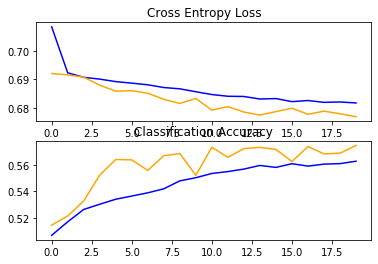

In [21]:
summarize_diagnostics(history)

# no dropout

In [121]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D, BatchNormalization

model1 = Sequential()
model1.add(Conv1D(32, 100, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(100, 1)))
model1.add(MaxPooling1D(2))
model1.add(BatchNormalization())
model1.add(Conv1D(64, 100, activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(MaxPooling1D(2))
model1.add(BatchNormalization())
model1.add(Conv1D(128, 100, activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(MaxPooling1D(2))
model1.add(BatchNormalization())
model1.add(Flatten())
model1.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model1.add(Dropout(0.2))
model1.add(Dense(1, activation='sigmoid'))

In [122]:
from keras.optimizers import Adam
opt = Adam(lr=0.00001)
model1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [123]:
history1 = model1.fit(E8X_train, E8Y_train, batch_size=64, validation_data=(E8X_test, E8Y_test), epochs=20)

Train on 160045 samples, validate on 40012 samples
Epoch 1/20
160045/160045 [==============================] - 183s 1ms/step - loss: 0.6900 - accuracy: 0.5512 - val_loss: 0.6830 - val_accuracy: 0.5554
Epoch 2/20
160045/160045 [==============================] - 181s 1ms/step - loss: 0.6791 - accuracy: 0.5648 - val_loss: 0.6749 - val_accuracy: 0.5744
Epoch 3/20
160045/160045 [==============================] - 179s 1ms/step - loss: 0.6766 - accuracy: 0.5709 - val_loss: 0.6720 - val_accuracy: 0.5770
Epoch 4/20
160045/160045 [==============================] - 134s 836us/step - loss: 0.6746 - accuracy: 0.5741 - val_loss: 0.6703 - val_accuracy: 0.5805
Epoch 5/20
160045/160045 [==============================] - 175s 1ms/step - loss: 0.6731 - accuracy: 0.5768 - val_loss: 0.6724 - val_accuracy: 0.5820
Epoch 6/20
160045/160045 [==============================] - 185s 1ms/step - loss: 0.6715 - accuracy: 0.5805 - val_loss: 0.6734 - val_accuracy: 0.5752
Epoch 7/20
160045/160045 [=====================

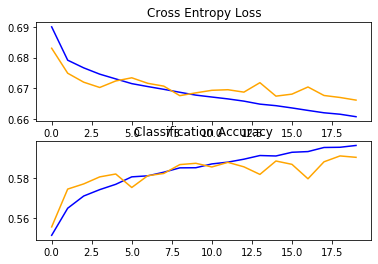

In [124]:
summarize_diagnostics(history1)

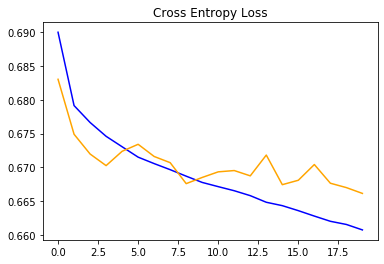

In [126]:
    plt.title('Cross Entropy Loss')
    plt.plot(history1.history['loss'], color='blue', label='train')
    plt.plot(history1.history['val_loss'], color='orange', label='test')

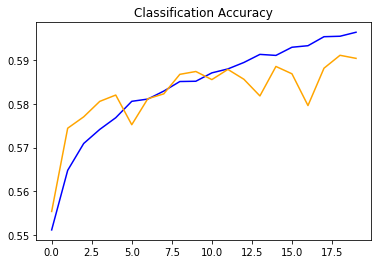

In [129]:
    plt.title('Classification Accuracy')
    plt.plot(history1.history['accuracy'], color='blue', label='train')
    plt.plot(history1.history['val_accuracy'], color='orange', label='test')

In [142]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D, BatchNormalization
from keras import regularizers

model2 = Sequential()
model2.add(Conv1D(32, 100, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(100, 1)))
model2.add(MaxPooling1D(2))
model2.add(BatchNormalization())
model2.add(Conv1D(64, 100, activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling1D(2))
model2.add(BatchNormalization())
model2.add(Conv1D(128, 100, activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling1D(2))
model2.add(BatchNormalization())
model2.add(Flatten())
model2.add(Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.01)))
model2.add(Dropout(0.3))
model2.add(Dense(1, activation='sigmoid'))

In [143]:
from keras.optimizers import Adam
opt = Adam(lr=0.00001)
model2.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [144]:
history2 = model2.fit(E8X_train, E8Y_train, batch_size=64, validation_data=(E8X_test, E8Y_test), epochs=100)

Train on 160045 samples, validate on 40012 samples
Epoch 1/100
160045/160045 [==============================] - 130s 815us/step - loss: 2.8099 - accuracy: 0.5440 - val_loss: 2.3551 - val_accuracy: 0.5666
Epoch 2/100
160045/160045 [==============================] - 127s 794us/step - loss: 1.9868 - accuracy: 0.5603 - val_loss: 1.6610 - val_accuracy: 0.5690
Epoch 3/100
160045/160045 [==============================] - 128s 800us/step - loss: 1.4352 - accuracy: 0.5706 - val_loss: 1.2523 - val_accuracy: 0.5729
Epoch 4/100
160045/160045 [==============================] - 130s 812us/step - loss: 1.1384 - accuracy: 0.5717 - val_loss: 1.0450 - val_accuracy: 0.5804
Epoch 5/100
160045/160045 [==============================] - 128s 798us/step - loss: 0.9895 - accuracy: 0.5760 - val_loss: 0.9377 - val_accuracy: 0.5802
Epoch 6/100
160045/160045 [==============================] - 128s 802us/step - loss: 0.9037 - accuracy: 0.5778 - val_loss: 0.8716 - val_accuracy: 0.5797
Epoch 7/100
160045/160045 [====

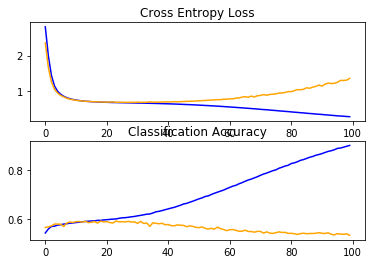

In [145]:
summarize_diagnostics(history2)

In [ ]:
plt.title('Cross Entropy Loss')
plt.plot(history2.history['loss'], color='blue', label='train')
plt.plot(history2.history['val_loss'], color='orange', label='test')

In [ ]:
plt.title('Classification Accuracy')
plt.plot(history2.history['accuracy'], color='blue', label='train')
plt.plot(history2.history['val_accuracy'], color='orange', label='test')

In [61]:
model3 = Sequential()
#model1.add(Input(shape=(21,1)))
model3.add(Flatten(input_shape=(100,1)))
model3.add(BatchNormalization())
model3.add(Dense(50, activation='relu', kernel_initializer='he_uniform'))
model3.add(Dense(25, activation='relu', kernel_initializer='he_uniform'))
model3.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model3.add(Dense(1, activation='sigmoid'))

In [62]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model3.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [63]:
history3 = model3.fit(E8X_train, E8Y_train, batch_size=64, validation_data=(E8X_test, E8Y_test), epochs=20)

Train on 160045 samples, validate on 40012 samples
Epoch 1/20
160045/160045 [==============================] - 7s 43us/step - loss: 0.6901 - accuracy: 0.5321 - val_loss: 0.6856 - val_accuracy: 0.5540
Epoch 2/20
160045/160045 [==============================] - 7s 44us/step - loss: 0.6822 - accuracy: 0.5598 - val_loss: 0.6781 - val_accuracy: 0.5728
Epoch 3/20
160045/160045 [==============================] - 7s 44us/step - loss: 0.6781 - accuracy: 0.5683 - val_loss: 0.6754 - val_accuracy: 0.5756
Epoch 4/20
160045/160045 [==============================] - 7s 44us/step - loss: 0.6766 - accuracy: 0.5702 - val_loss: 0.6742 - val_accuracy: 0.5763
Epoch 5/20
160045/160045 [==============================] - 9s 56us/step - loss: 0.6753 - accuracy: 0.5721 - val_loss: 0.6732 - val_accuracy: 0.5804
Epoch 6/20
160045/160045 [==============================] - 8s 50us/step - loss: 0.6743 - accuracy: 0.5752 - val_loss: 0.6725 - val_accuracy: 0.5813
Epoch 7/20
160045/160045 [=============================

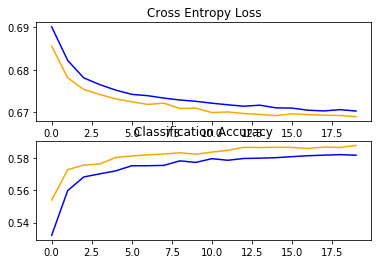

In [64]:
summarize_diagnostics(history3)

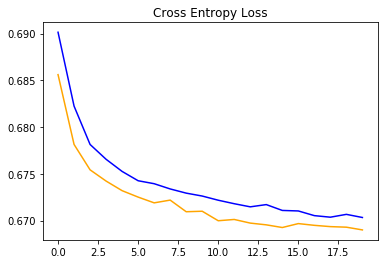

In [128]:
    plt.title('Cross Entropy Loss')
    plt.plot(history3.history['loss'], color='blue', label='train')
    plt.plot(history3.history['val_loss'], color='orange', label='test')

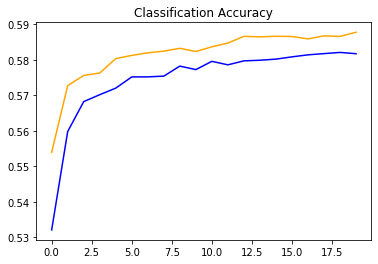

In [130]:
    plt.title('Classification Accuracy')
    plt.plot(history3.history['accuracy'], color='blue', label='train')
    plt.plot(history3.history['val_accuracy'], color='orange', label='test')

In [112]:
model4 = Sequential()
model4.add(Flatten(input_shape=(100,1)))
model4.add(BatchNormalization())
model4.add(Dense(50, activation='relu')) #, kernel_initializer='he_uniform'))
model4.add(Dense(25, activation='relu')) #, kernel_initializer='he_uniform'))
model4.add(Dense(10, activation='relu')) #, kernel_initializer='he_uniform'))
model4.add(Dense(1, activation='sigmoid'))

In [113]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model4.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [114]:
history4 = model4.fit(E8X_train, E8Y_train, batch_size=64, validation_data=(E8X_test, E8Y_test), epochs=100)

Train on 160045 samples, validate on 40012 samples
Epoch 1/100
160045/160045 [==============================] - 7s 43us/step - loss: 0.6898 - accuracy: 0.5320 - val_loss: 0.6840 - val_accuracy: 0.5644
Epoch 2/100
160045/160045 [==============================] - 6s 37us/step - loss: 0.6811 - accuracy: 0.5632 - val_loss: 0.6761 - val_accuracy: 0.5752
Epoch 3/100
160045/160045 [==============================] - 6s 37us/step - loss: 0.6769 - accuracy: 0.5694 - val_loss: 0.6736 - val_accuracy: 0.5772
Epoch 4/100
160045/160045 [==============================] - 6s 37us/step - loss: 0.6753 - accuracy: 0.5744 - val_loss: 0.6723 - val_accuracy: 0.5805
Epoch 5/100
160045/160045 [==============================] - 6s 37us/step - loss: 0.6744 - accuracy: 0.5750 - val_loss: 0.6713 - val_accuracy: 0.5803
Epoch 6/100
160045/160045 [==============================] - 6s 36us/step - loss: 0.6741 - accuracy: 0.5749 - val_loss: 0.6714 - val_accuracy: 0.5827
Epoch 7/100
160045/160045 [======================

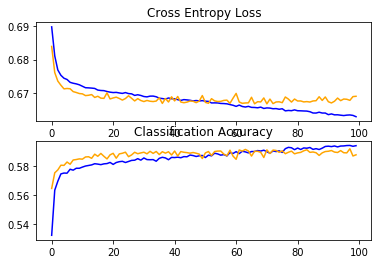

In [120]:
summarize_diagnostics(history4)

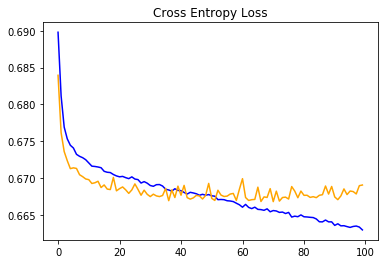

In [127]:
    plt.title('Cross Entropy Loss')
    plt.plot(history4.history['loss'], color='blue', label='train')
    plt.plot(history4.history['val_loss'], color='orange', label='test')

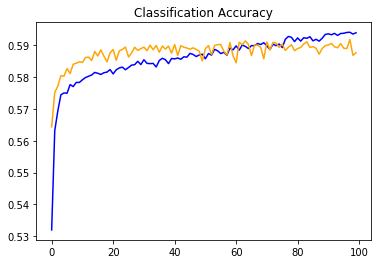

In [131]:
    plt.title('Classification Accuracy')
    plt.plot(history4.history['accuracy'], color='blue', label='train')
    plt.plot(history4.history['val_accuracy'], color='orange', label='test')